In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('../datasets/nyc_taxi.csv')

Intentemos detectar temporalidad mediante la transformada de fourier.

Periodo estimado: 48.00


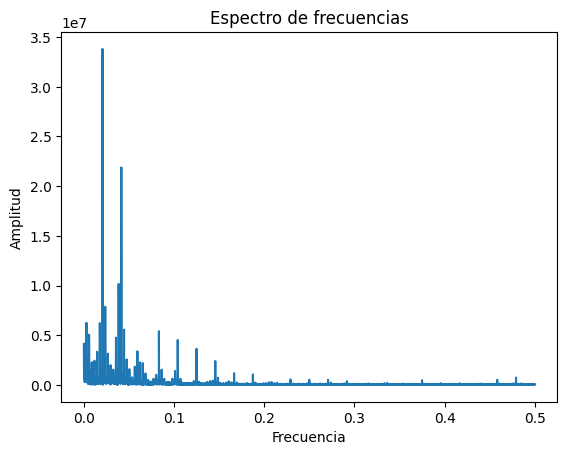

In [3]:
# Transformada de Fourier
fft = np.fft.fft(df["value"])
freq = np.fft.fftfreq(len(df["value"]))

# Filtrar frecuencias positivas
positive_freqs = freq[freq > 0]
positive_fft = np.abs(fft[freq > 0])

# Identificar la frecuencia con mayor amplitud
dominant_frequency = positive_freqs[np.argmax(positive_fft)]
period = 1 / dominant_frequency

print(f"Periodo estimado: {period:.2f}")

# Opcional: graficar espectro
plt.plot(positive_freqs, positive_fft)
plt.title('Espectro de frecuencias')
plt.xlabel('Frecuencia')
plt.ylabel('Amplitud')
plt.show()

Periodo estimado 48, hace referencia a 24*2, es mas o menos cierto, el periodo que mejor se ajusta a nuestro análisis deberia ser el semanal :(.

In [4]:
dominant_frequencies = np.argsort(positive_fft)[::-1]
top_frequencies = positive_freqs[dominant_frequencies]
periods = 1 / top_frequencies